In [2]:
!pip install pyreadstat
!pip install pandas
!pip install request
!pip install seaborn
!pip install scipy
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [10]:
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyreadstat
import os

In [11]:
#  checking for xpt file that are non readable with pyreadtat because of formatting issue
folder = "/content/raw/"
for file in os.listdir(folder):
    if file.endswith(".xpt"):
        path = os.path.join(folder, file)
        try:
            df, meta = pyreadstat.read_xport(path)
            print(f"✅ Loaded: {file}")
        except Exception as e:
            print(f"❌ Failed: {file} — {e}")

✅ Loaded: WHQ_L.xpt
✅ Loaded: BPXO_L.xpt
✅ Loaded: KIQ_U_L.xpt
✅ Loaded: VID_L.xpt
❌ Failed: DEMO_L.xpt — 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte
✅ Loaded: HEPB_S_L.xpt
✅ Loaded: PAQ_L.xpt
✅ Loaded: DPQ_L.xpt


In [12]:
# attempted to use pyreadstat to read xpt file
# the  file has invalid type of formatting
# tried multiple scripts but gives me more issues.
df, meta = pyreadstat.read_xport("/content/raw/DEMO_L.xpt")
print(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte

In [13]:
# gave up on converting to change formatting issue in the xpt file and tried to use R instead

In [ ]:
# Using R to convert xpt to csv
# Change Runtime Type to R, prior to doing the script below
# Installing haven (only needed once)
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Converting single .xpt file to .csv
library(haven)
data <- read_xpt("/content/raw/DPQ_L.xpt")
write.csv(data, "/content/raw/DPQ_L.csv", row.names = FALSE)

In [ ]:
# Load the library
library(haven)

# Set folder path
folder <- "/content/raw"

In [ ]:

# Converting all .xpt files to .csv

# List all .xpt files
xpt_files <- list.files(folder, pattern = "\\.xpt$", full.names = TRUE)

# Loop through and convert each to .csv
for (xpt_file in xpt_files) {
  # Read .xpt file
  data <- read_xpt(xpt_file)

  # Create .csv filename
  csv_file <- sub("\\.xpt$", ".csv", xpt_file)

  # Write to CSV
  write.csv(data, csv_file, row.names = FALSE)

  cat("✅ Converted:", xpt_file, "→", csv_file, "\n")
}

✅ Converted: /content/raw/BPXO_L.xpt → /content/raw/BPXO_L.csv 
✅ Converted: /content/raw/DEMO_L.xpt → /content/raw/DEMO_L.csv 
✅ Converted: /content/raw/HEPB_S_L.xpt → /content/raw/HEPB_S_L.csv 
✅ Converted: /content/raw/KIQ_U_L.xpt → /content/raw/KIQ_U_L.csv 
✅ Converted: /content/raw/PAQ_L.xpt → /content/raw/PAQ_L.csv 
✅ Converted: /content/raw/VID_L.xpt → /content/raw/VID_L.csv 
✅ Converted: /content/raw/WHQ_L.xpt → /content/raw/WHQ_L.csv 


In [17]:
# Change Runtime Type back to Python prior to scripts below
# Mapping urls
demo = pd.read_csv("/content/raw/DEMO_L.csv")
bp = pd.read_csv("/content/raw/BPXO_L.csv")
vitd = pd.read_csv("/content/raw/VID_L.csv")
hepb = pd.read_csv("/content/raw/HEPB_S_L.csv")
kidney = pd.read_csv("/content/raw/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/raw/PAQ_L.csv")
weight = pd.read_csv("/content/raw/WHQ_L.csv")
mental = pd.read_csv("/content/raw/DPQ_L.csv")

In [20]:
## Analysis 1:## Analysis 1: Chi-square test between marital status and education level
# Step 1: Select and clean relevant columns
Analysis1 = (
    demo[['DMDMARTZ', 'DMDEDUC2']]
    .drop_duplicates()
    .query("DMDMARTZ.notna() and DMDEDUC2.notna()")
    .query("DMDMARTZ not in [77, 99] and DMDEDUC2 not in [7, 9]")
)

# Step 2: Recode categories
marital_map = {1: 'Married', 2: 'Widowed/Divorced/Separated', 3: 'Single'}
Analysis1['MaritalStatus'] = Analysis1['DMDMARTZ'].map(marital_map)

Analysis1['EducLevel'] = Analysis1['DMDEDUC2'].apply(
    lambda x: 'Bachelor or Higher' if x == 5 else 'Less than Bachelor'
)

# Step 3: Drop rows with missing recodes
filtered = Analysis1[['MaritalStatus', 'EducLevel']].dropna()

# Step 4: Contingency table and chi-square test
contingency_table = pd.crosstab(filtered['MaritalStatus'], filtered['EducLevel'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 5: Output results
print("Contingency Table:\n", contingency_table)
print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\n✅ Statistically significant association between marital status and education level.")
else:
    print("\n❌ No statistically significant association found.")

Contingency Table:
 EducLevel                   Bachelor or Higher  Less than Bachelor
MaritalStatus                                                     
Married                                      1                   4
Single                                       1                   4
Widowed/Divorced/Separated                   1                   4

Chi-square Statistic: 0.00
Degrees of Freedom: 2
P-value: 1.0000

❌ No statistically significant association found.


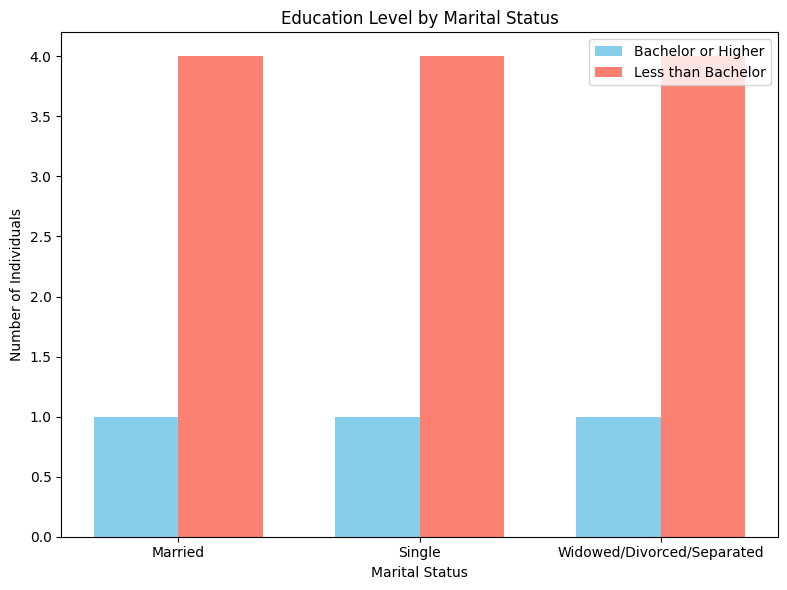

In [19]:
# Step 6: Visualization (replace with actual counts if needed)
categories = contingency_table.index.tolist()
bachelor_counts = contingency_table['Bachelor or Higher'].tolist()
less_bachelor_counts = contingency_table['Less than Bachelor'].tolist()

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, bachelor_counts, width, label='Bachelor or Higher', color='skyblue')
ax.bar(x + width/2, less_bachelor_counts, width, label='Less than Bachelor', color='salmon')

ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Individuals')
ax.set_title('Education Level by Marital Status')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()